# Titanic

dataset : https://www.kaggle.com/c/titanic

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

* %matplotlib inline을 해주어야 현재 페이지에서 그래프를 출력해줌.

In [2]:
titanic_ds = sns.load_dataset('titanic')

In [34]:
titanic_ds.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,count
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,1
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,1
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,1
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,1
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,1


* Dataset 크기

In [4]:
titanic_ds.shape

(891, 15)

* Summary 보기

In [5]:
titanic_ds.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* corr은 NaN 값을 제외한 열의 상관 관계 계산

In [6]:
cor = titanic_ds.corr()

In [7]:
cor

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


* seaborn 패키지를 사용하여 상관 관계를 눈으로 보기 쉽게 히트맵으로 출력

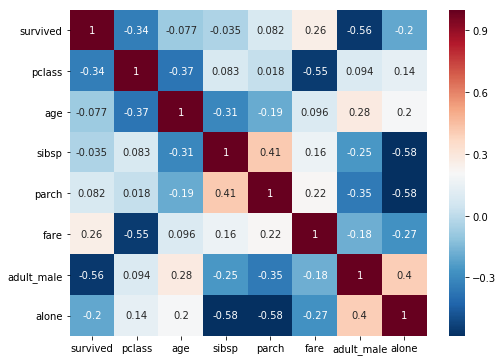

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(cor, cmap='RdBu_r', annot=True)

* cumsum 함수를 실행하면 요청된 열에 대해 순차적으로 합산된 값을 반환한다.

In [9]:
titanic_ds.sort_values('fare', ascending=False)\
            .reset_index()['fare']\
            .cumsum()

0        512.3292
1       1024.6584
2       1536.9876
3       1799.9876
4       2062.9876
5       2325.9876
6       2588.9876
7       2851.3626
8       3113.7376
9       3361.2584
10      3608.7792
11      3836.3042
12      4063.8292
13      4291.3542
14      4518.8792
15      4740.6584
16      4952.1584
17      5163.4959
18      5374.8334
19      5586.1709
20      5751.0376
21      5915.9043
22      6069.3668
23      6222.8293
24      6376.2918
25      6527.8418
26      6679.3918
27      6830.9418
28      6982.4918
29      7129.0126
          ...    
861    28604.5161
862    28611.5619
863    28618.5369
864    28625.5119
865    28632.4619
866    28639.3202
867    28646.0702
868    28652.8202
869    28659.3160
870    28665.8118
871    28672.2618
872    28678.6993
873    28684.9368
874    28689.9368
875    28693.9493
876    28693.9493
877    28693.9493
878    28693.9493
879    28693.9493
880    28693.9493
881    28693.9493
882    28693.9493
883    28693.9493
884    28693.9493
885    286

* 위 실행 결과는 sort_values 함수를 통해 fare 열을 내림차순으로 정렬하고, reset_index를 통해 전체 row에서 fare 열만 출력하도록 한 후 cumsum 함수를 통해 순차적으로 합산된 결과를 반환한다.
* 결과를 아래와 같이 plot 함수를 통해 그래프화 할 수 있다.

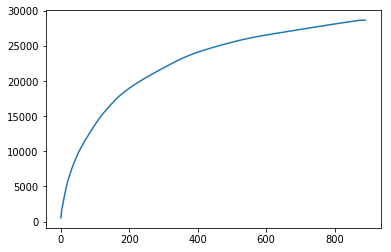

In [17]:
titanic_ds.sort_values('fare', ascending=False)\
            .reset_index()['fare']\
            .cumsum()\
            .plot()

In [32]:
titanic_ds['count'] = 1
titanic_ds.groupby('survived')\
            .count()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,count
survived,,,,,,,,,,,,,,,
0,549,549,424,549,549,549,549,549,549,549,67,549,549,549,549
1,342,342,290,342,342,342,340,342,342,342,136,340,342,342,342


In [33]:
titanic_ds.groupby('survived')\
            .count()[['count']]

,count
survived,
0,549
1,342


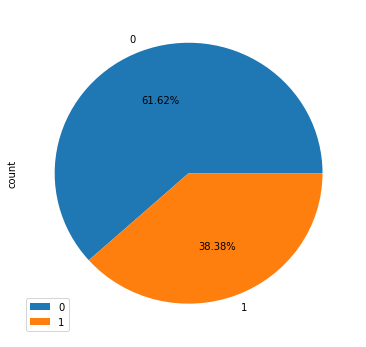

In [31]:
titanic_ds.groupby('survived')\
            .count()[['count']]\
            .plot(kind='pie', y='count', autopct='%.2f%%', figsize=(6,6))

## Plotting 해보기

In [14]:
import numpy as np

In [15]:
data = np.sin(np.arange(0,10,.1))

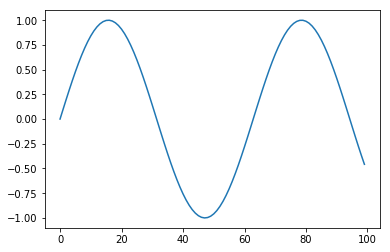

In [16]:
plt.plot(data)